<a href="https://www.kaggle.com/code/sidhanthprabhudesai/airbnb?scriptVersionId=250298486" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indias-airbnb-gems-2024-trending-picks/Airbnb_India_Top_500.csv


In [2]:
df=pd.read_csv('/kaggle/input/indias-airbnb-gems-2024-trending-picks/Airbnb_India_Top_500.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Data exploration# 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [5]:
df.isnull().sum()

address                  0
isHostedBySuperhost      0
location/lat             0
location/lng             0
name                     0
numberOfGuests           0
pricing/rate/amount      0
roomType                 0
stars                  304
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

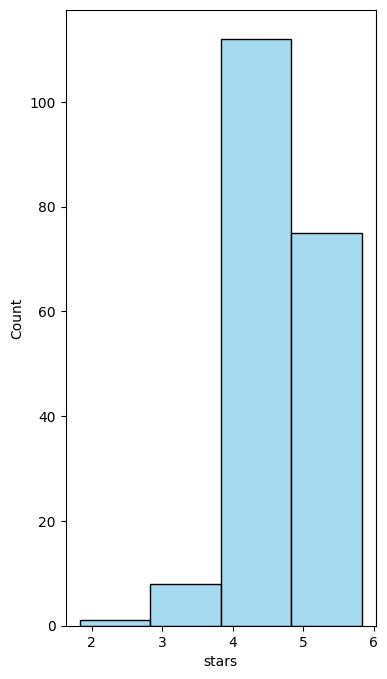

In [6]:
plt.figure(figsize=(4, 8))
sns.histplot(data=df, x='stars', discrete=True, color='skyblue')

In [7]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75


In [8]:
df['stars_label'] = df['stars'].fillna('Unrated')


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 1600x800 with 0 Axes>

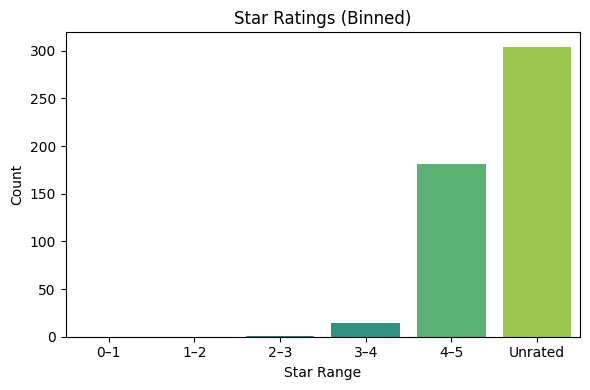

In [9]:
plt.figure(figsize=(16, 8))
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']
df['stars_binned'] = pd.cut(df['stars'], bins=bins, labels=labels, include_lowest=True)
df['stars_binned'] = df['stars_binned'].cat.add_categories('Unrated')  # To add 'Unrated' as category
df['stars_binned'] = df['stars_binned'].fillna('Unrated')
order = ['Unrated','0–1', '1–2', '2–3', '3–4', '4–5']
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stars_binned', palette='viridis')

plt.title('Star Ratings (Binned)')
plt.xlabel('Star Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
numeric_list = df.select_dtypes(include='number').columns.tolist()
print(numeric_list)

['location/lat', 'location/lng', 'numberOfGuests', 'pricing/rate/amount', 'stars']


In [11]:
del numeric_list[0:2]

In [12]:
print(numeric_list)

['numberOfGuests', 'pricing/rate/amount', 'stars']


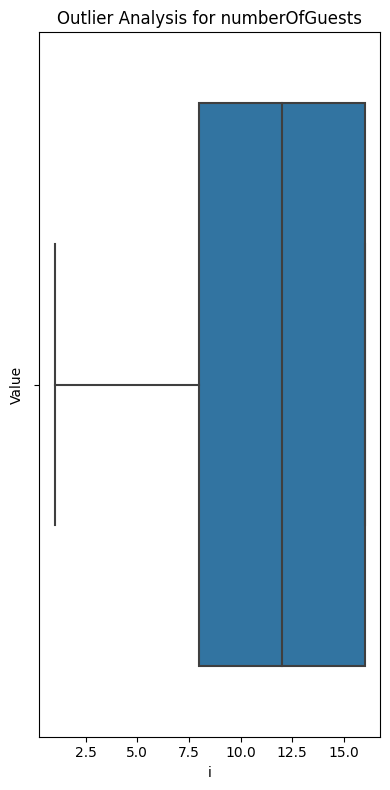

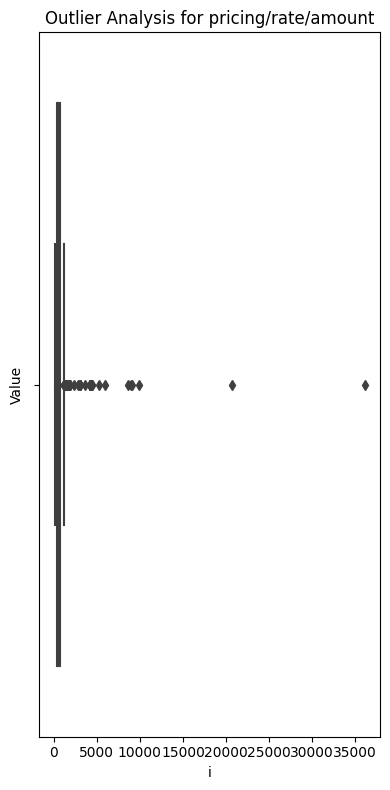

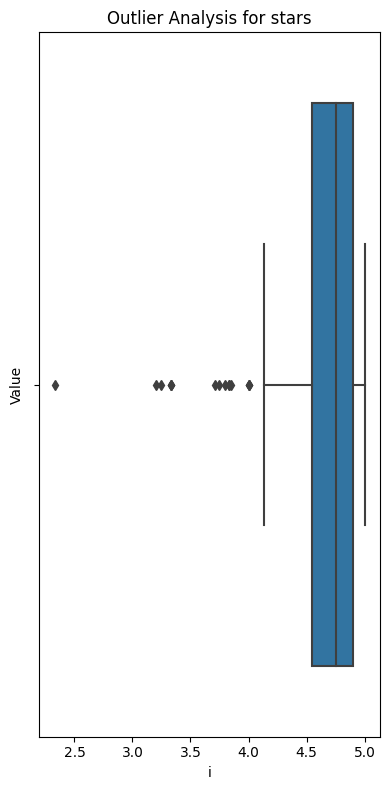

In [13]:
for i in numeric_list:
    plt.figure(figsize=(4,8))
    sns.boxplot(data=df,x=i)
    plt.title(f"Outlier Analysis for {i}")
    plt.xlabel('i')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

We have major outlliers for pricing which needs to be analysed treated 

Where as outliers in star might be a valid data which needs to be analysed and hence should not be manipulated for now

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pricing/rate/amount', ylabel='Count'>

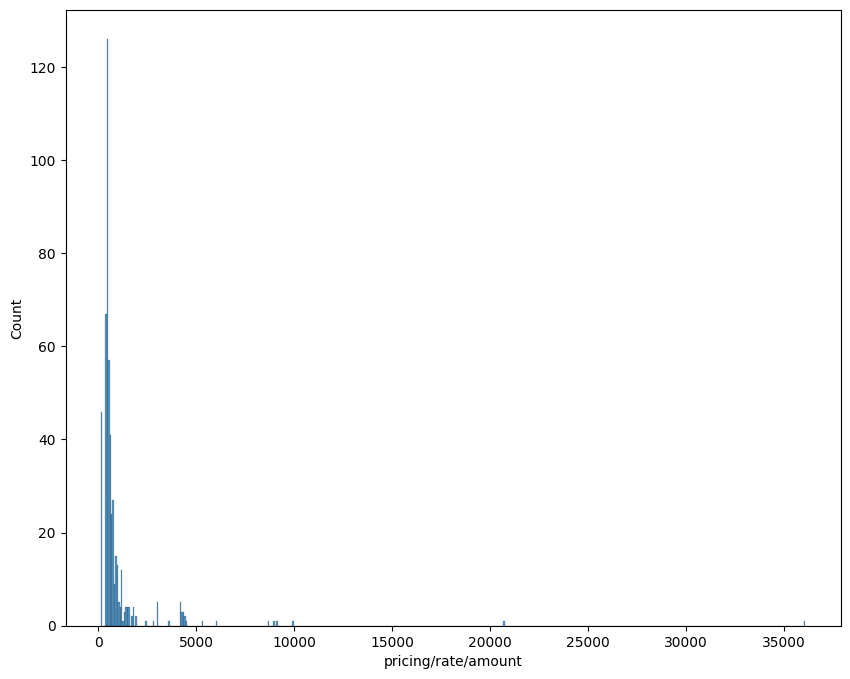

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='pricing/rate/amount')

In [15]:
print(df['pricing/rate/amount'].max())

36079


In [16]:
df['amount_clipped']=df['pricing/rate/amount'].clip(upper= 10000)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount_clipped', ylabel='Count'>

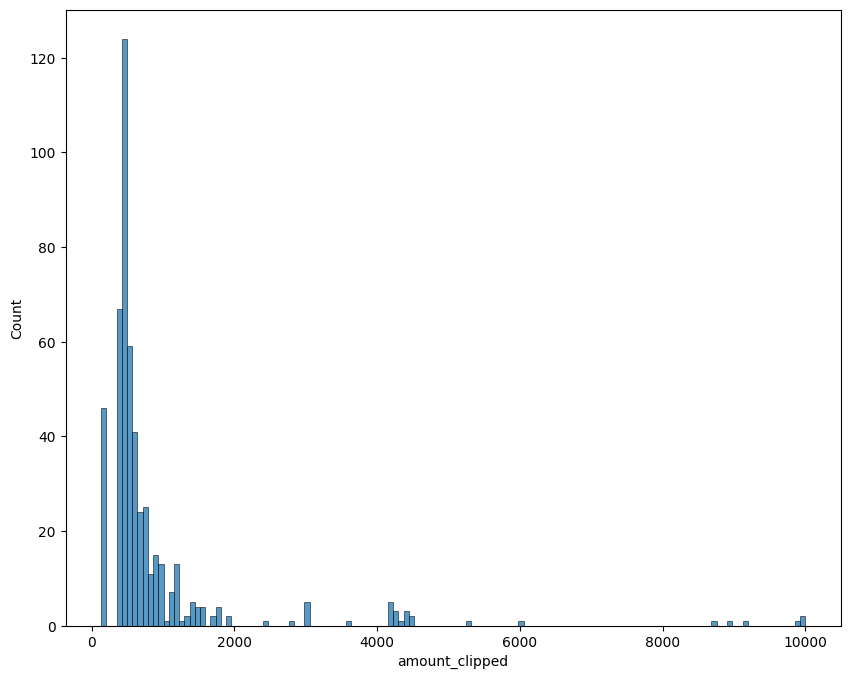

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='amount_clipped')

In [18]:
df['log_amount']= np.log(df['amount_clipped']+1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_amount', ylabel='Count'>

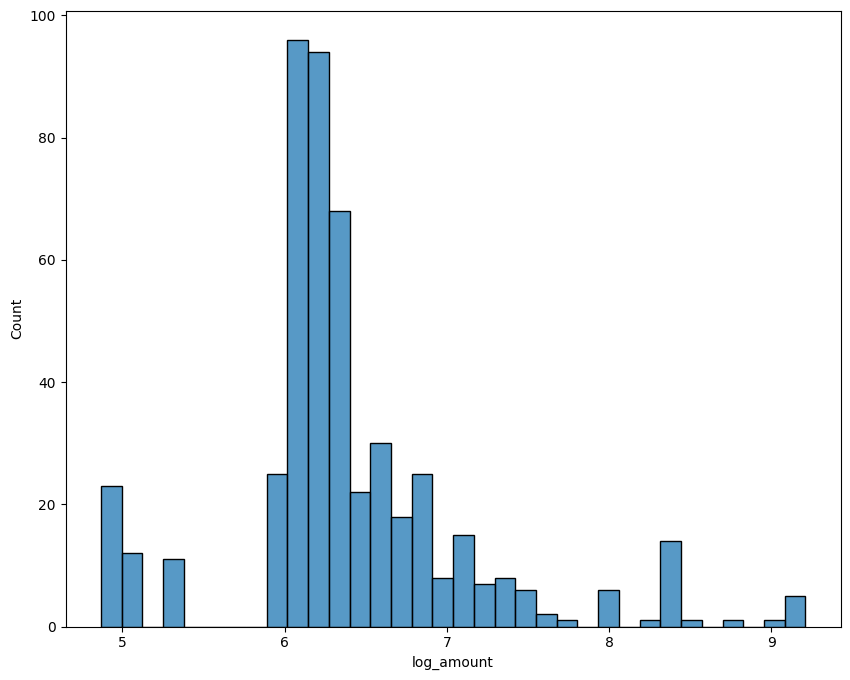

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='log_amount')

In [20]:
corr_matrix =df.corr(numeric_only=True)

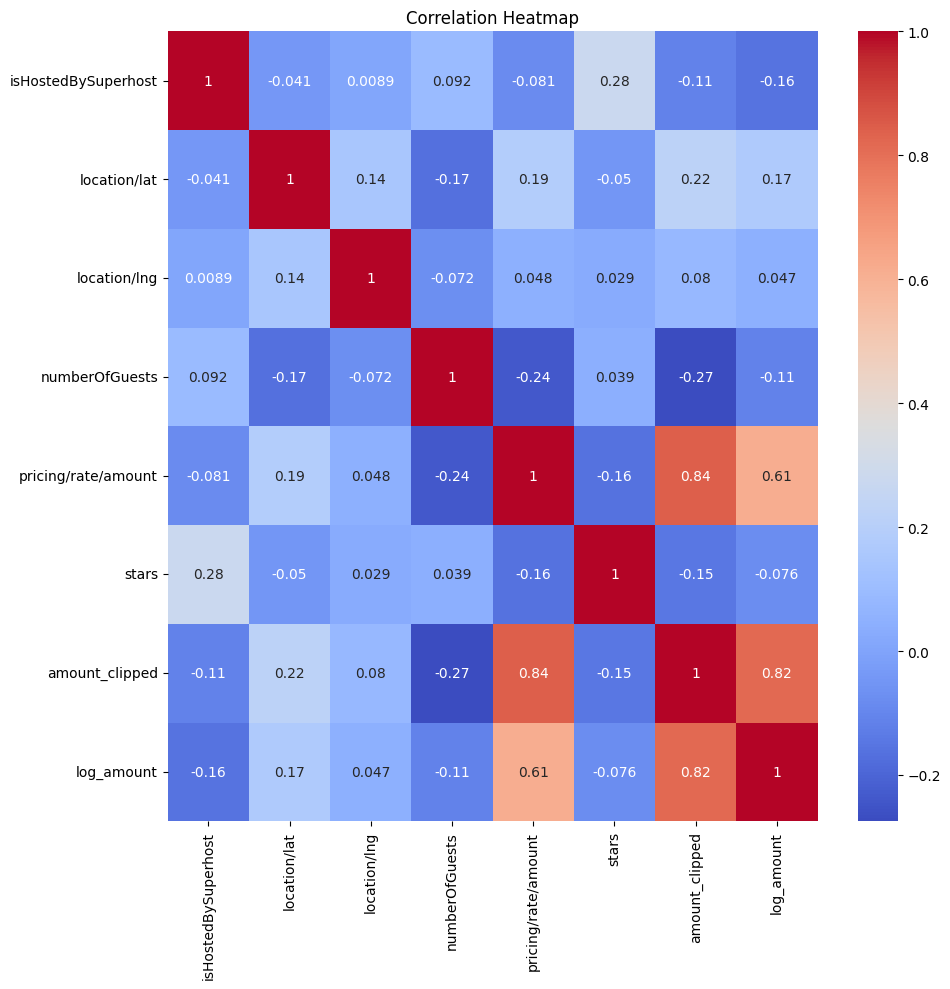

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot =True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

From correlation we have following observations

* Superhost is corelated with stars
* Guest number is negatively corelated with amount


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

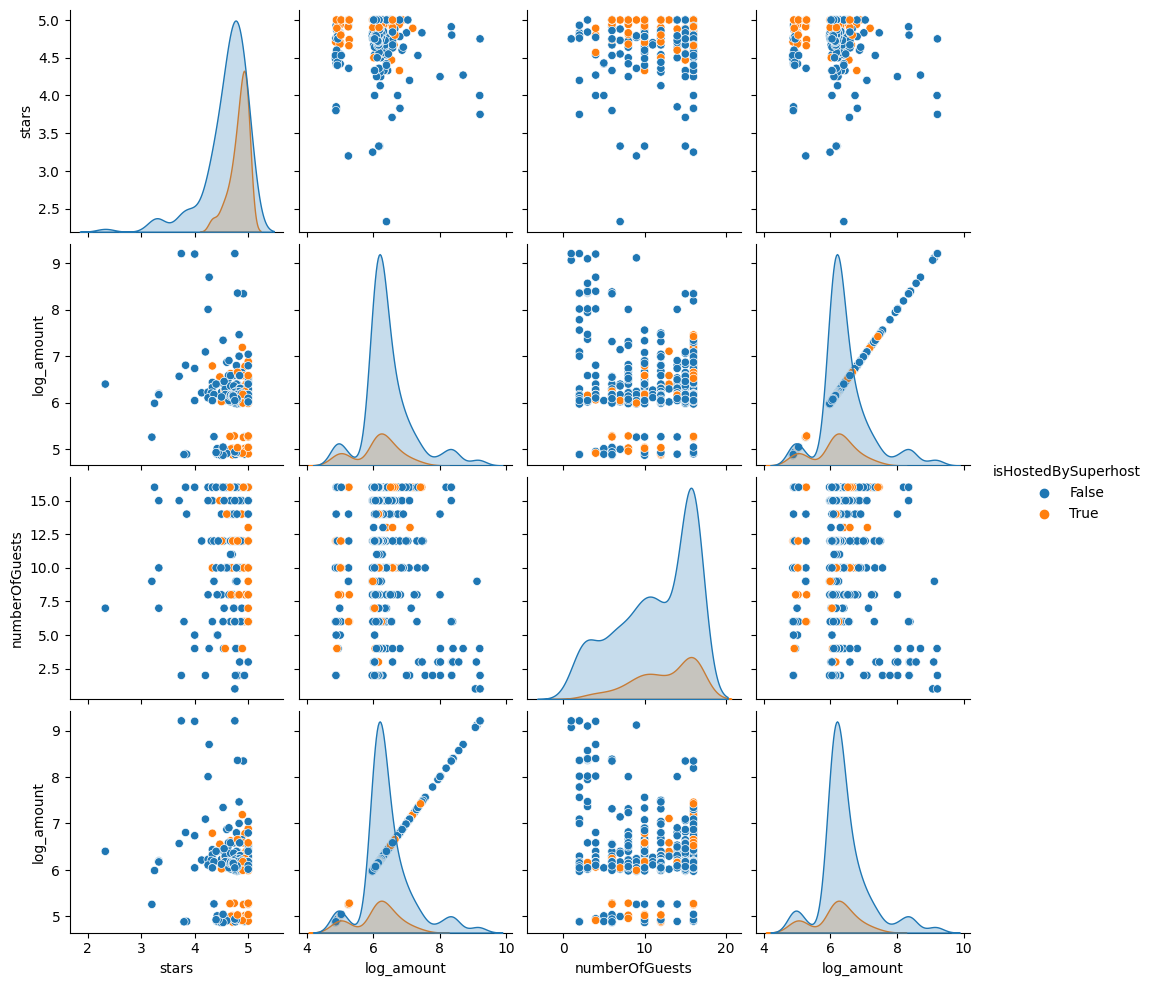

In [22]:
sns.pairplot(df, vars=['stars', 'log_amount', 'numberOfGuests', 'log_amount'], hue='isHostedBySuperhost')

In [23]:
df['address'].nunique()

217

# Analysis based on room type

In [24]:
roomtypes= df.groupby('roomType', as_index=False)['log_amount'].mean()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Log Amount by Room Type')

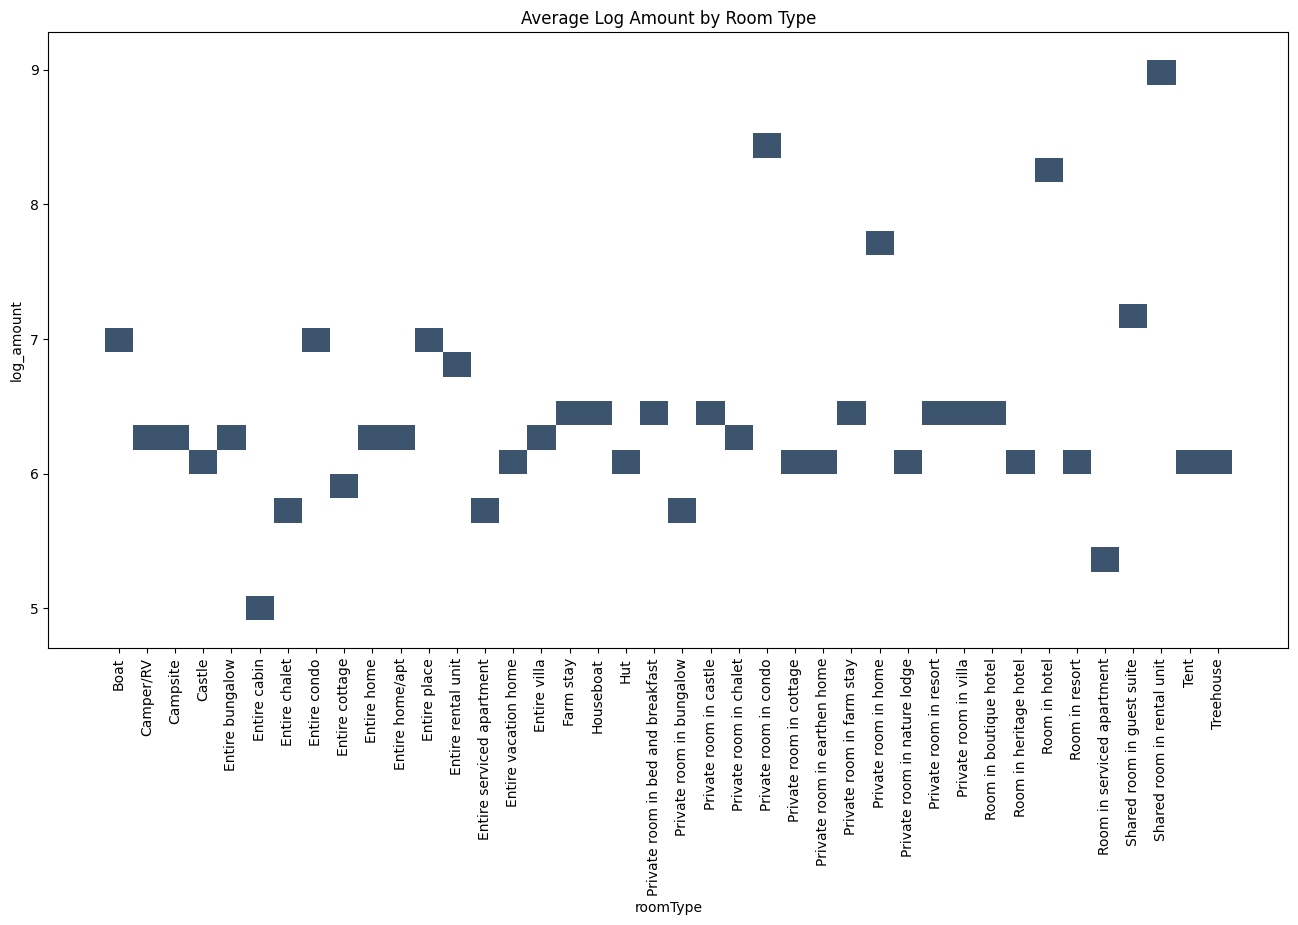

In [25]:
plt.figure(figsize=(16,8))
sns.histplot(data=roomtypes, x='roomType', y= 'log_amount' )
plt.xticks(rotation =90)
plt.title("Average Log Amount by Room Type")

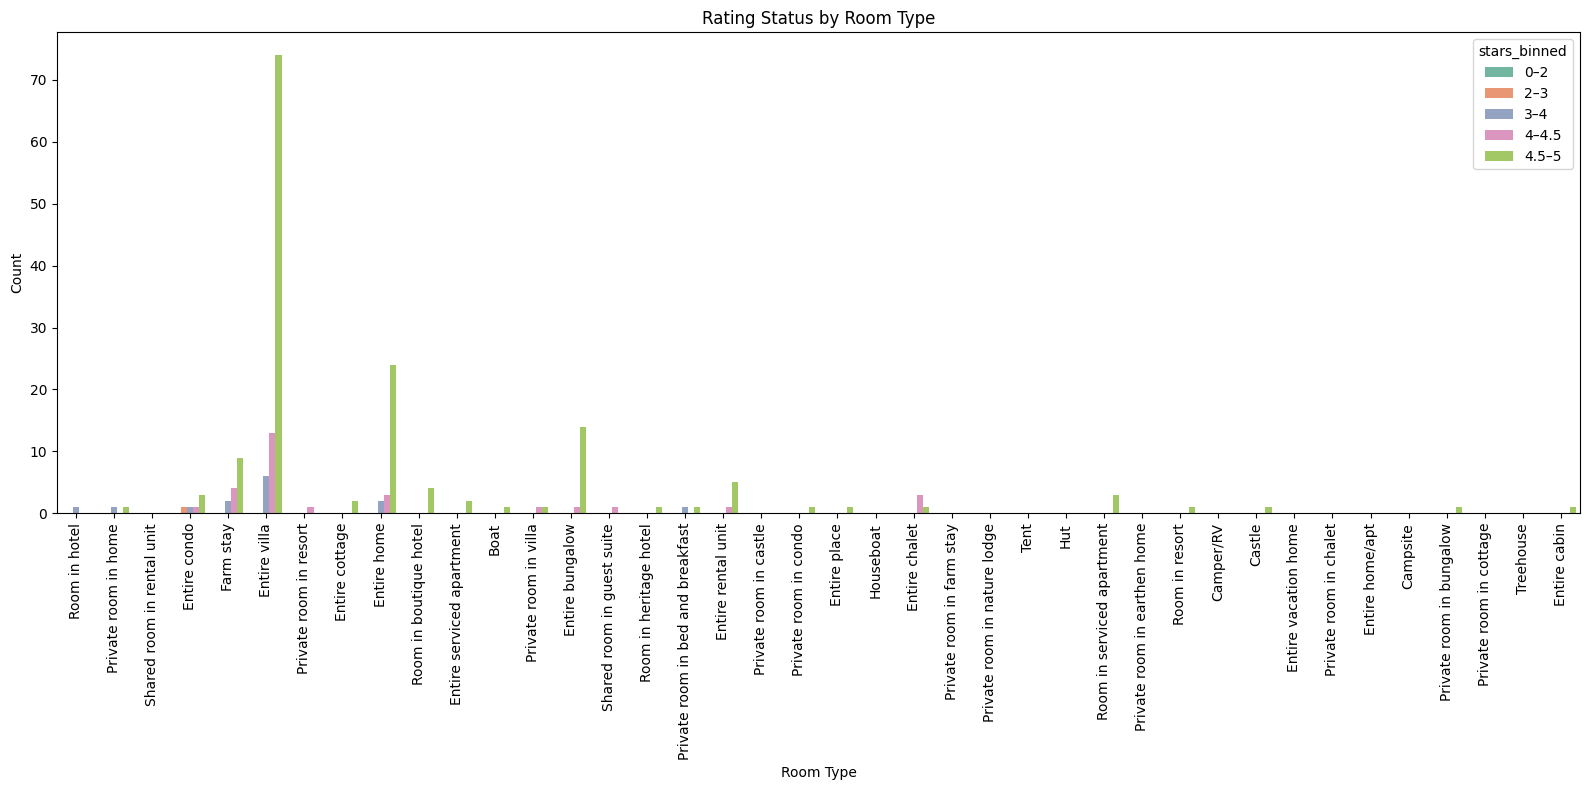

In [26]:
bins = [0, 2, 3, 4, 4.5, 5]
labels = ['0–2', '2–3', '3–4', '4–4.5', '4.5–5']
df['stars_binned'] = pd.cut(df['stars'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(16,8))
sns.countplot(data=df,x='roomType', hue= 'stars_binned',palette='Set2')
plt.xticks(rotation=90)
plt.title("Rating Status by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

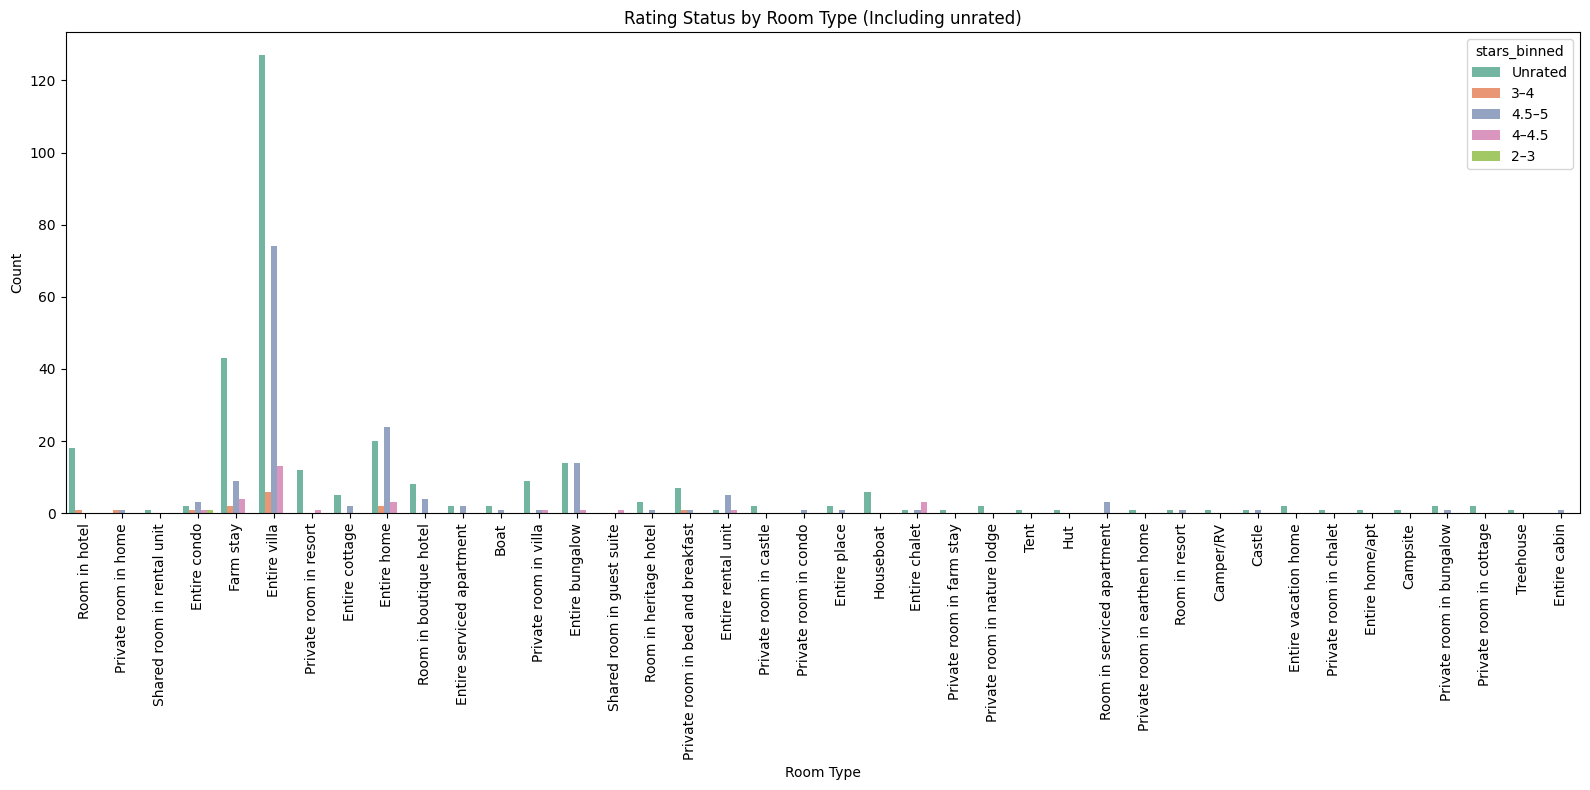

In [27]:
# Fill NaNs with 'Unrated'
df['stars_binned'] = df['stars_binned'].astype(object).fillna('Unrated')
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='roomType', hue= 'stars_binned',palette='Set2')
plt.xticks(rotation=90)
plt.title("Rating Status by Room Type (Including unrated)")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/3010471685.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='roomType', y='stars', estimator='mean', ci=None, palette='viridis')


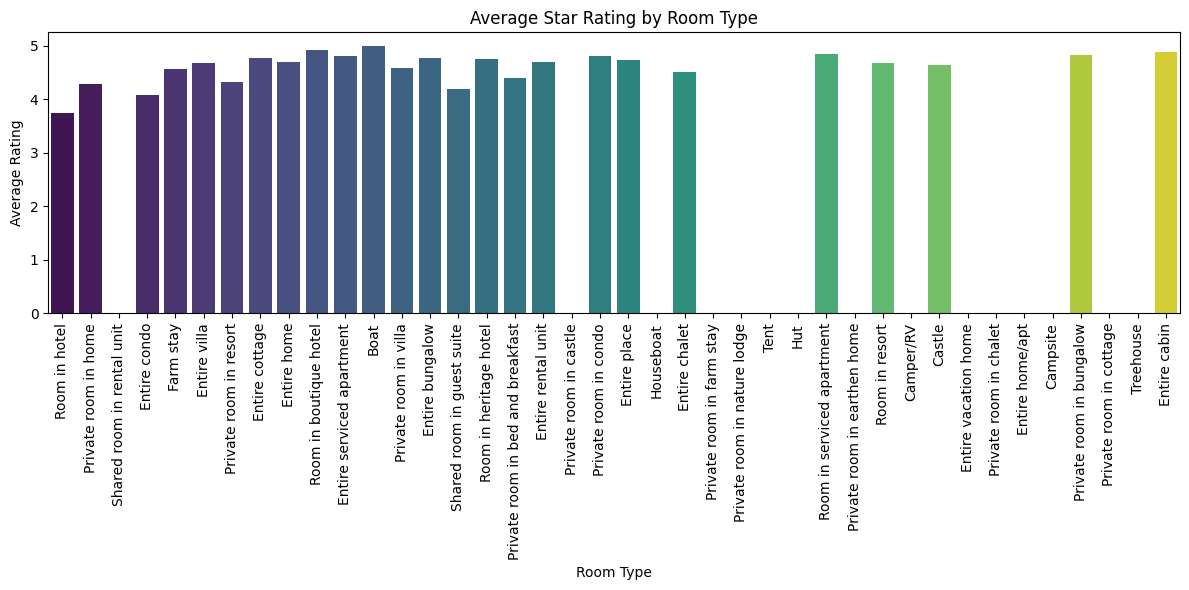

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='roomType', y='stars', estimator='mean', ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.title("Average Star Rating by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


In [29]:
room_superhost_counts =df.groupby('roomType')['isHostedBySuperhost'].value_counts().unstack(fill_value=0)
room_superhost_counts['Total'] = room_superhost_counts[False] + room_superhost_counts[True]
room_superhost_counts['Superhost %'] = (room_superhost_counts[True] / room_superhost_counts['Total'] * 100).round(2)

room_superhost_counts.columns = ['Non-Superhost', 'Superhost', 'Total', 'Superhost %']


print(room_superhost_counts.sort_values('Total', ascending=False))

                                   Non-Superhost  Superhost  Total  \
roomType                                                             
Entire villa                                 187         33    220   
Farm stay                                     48         10     58   
Entire home                                   34         15     49   
Entire bungalow                               19         10     29   
Room in hotel                                 19          0     19   
Private room in resort                        13          0     13   
Room in boutique hotel                         9          3     12   
Private room in villa                         11          0     11   
Private room in bed and breakfast              8          1      9   
Entire condo                                   6          2      8   
Entire rental unit                             7          0      7   
Entire cottage                                 7          0      7   
Houseboat           

# **State analysis**# 

In [30]:
fig = px.scatter_mapbox(
    df,
    lat="location/lat",
    lon="location/lng",
    color="isHostedBySuperhost",
    size="pricing/rate/amount",
    hover_name="name",
    zoom=10,
    mapbox_style="carto-positron"
)
fig.show()

In [31]:
print(df['address'])

0       Manali, Himachal Pradesh, India
1       Manali, Himachal Pradesh, India
2                            Goa, India
3      Bhuntar, Himachal Pradesh, India
4              Jaipur, Rajasthan, India
                     ...               
495         Nalambi, Maharashtra, India
496        Sughandhagiry, Kerala, India
497    Chalnichhina, Uttarakhand, India
498                          Goa, India
499               Munnar, Kerala, India
Name: address, Length: 500, dtype: object


In [32]:
df['state'] = df['address'].apply(
    lambda x: x.split(',')[1].strip() if len(x.split(',')) == 3 else x.split(',')[0].strip()
)

In [33]:
df.groupby('state')['address'].count().sort_values(ascending=False)
state_counts = df['state'].value_counts()

In [34]:
df['group_state']= df['state'].apply(lambda x: x if state_counts[x] >= 10 else 'Others')

In [35]:
print(df['group_state'].value_counts().sort_values(ascending=False))

group_state
Goa                 161
Maharashtra          95
Others               53
Rajasthan            38
Uttarakhand          33
Kerala               25
Himachal Pradesh     24
Delhi                23
Tamil Nadu           20
Haryana              15
Karnataka            13
Name: count, dtype: int64


Text(0.5, 1.0, 'Property listing per state')

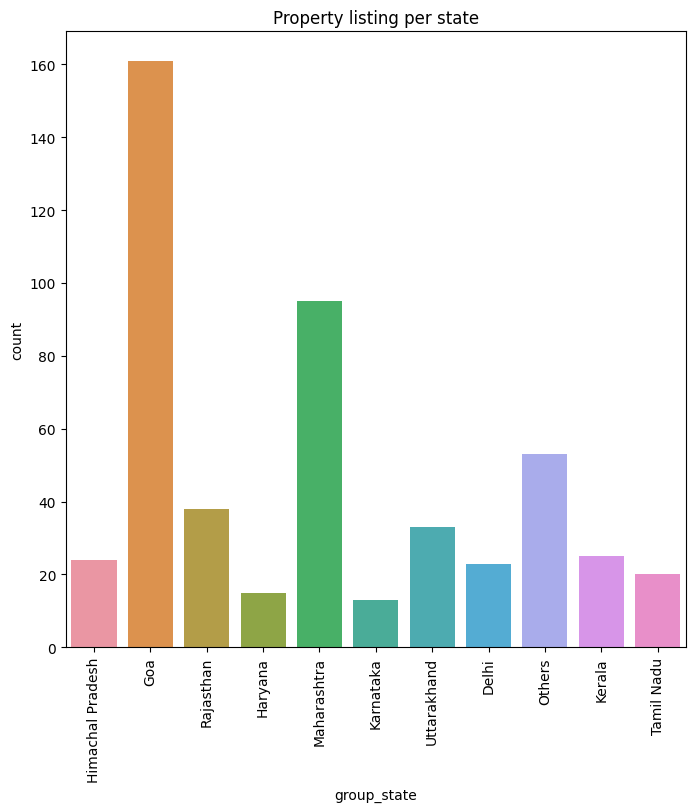

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='group_state')
plt.xticks(rotation=90)
plt.title('Property listing per state')

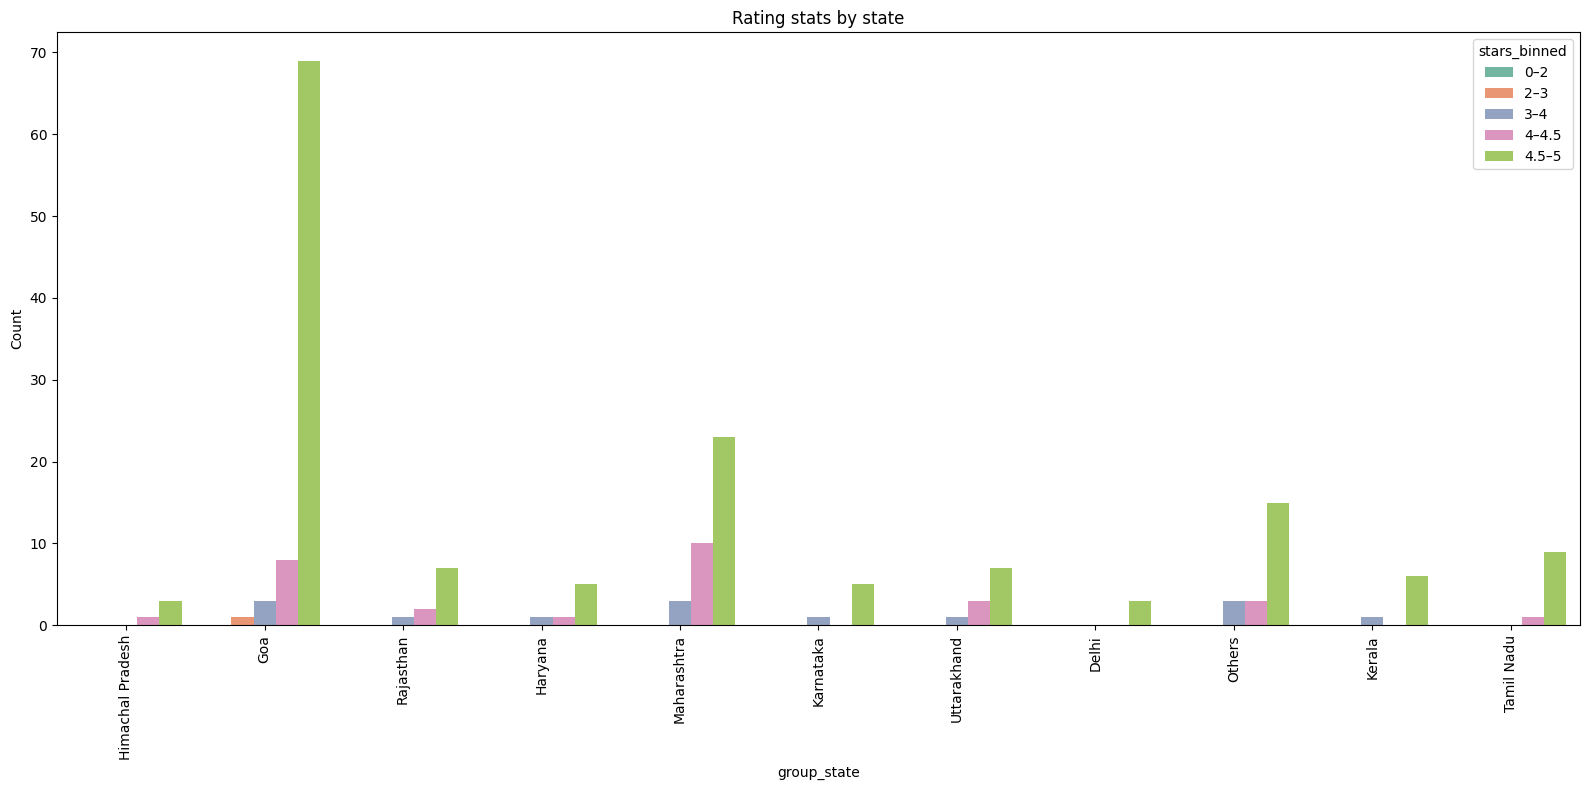

In [37]:
bins = [0, 2, 3, 4, 4.5, 5]
labels = ['0–2', '2–3', '3–4', '4–4.5', '4.5–5']
df['stars_binned'] = pd.cut(df['stars'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(16,8))
sns.countplot(data=df,x='group_state', hue= 'stars_binned',palette='Set2')
plt.xticks(rotation=90)
plt.title("Rating stats by state")
plt.xlabel("group_state")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

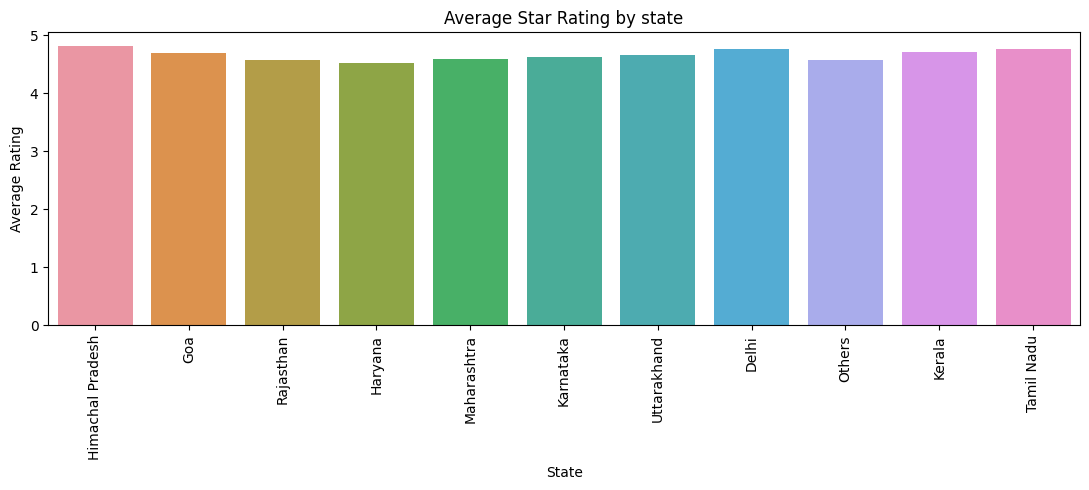

In [38]:
plt.figure(figsize=(11, 5))
sns.barplot(data=df, x='group_state', y='stars', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Star Rating by state")
plt.xlabel("State")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


In [39]:
avg_rating_state_superhost = df.groupby(['group_state', 'isHostedBySuperhost'])['stars'].mean().reset_index()


avg_rating_state_superhost.rename(columns={'isHostedBySuperhost': 'Superhost_Status', 'stars': 'Average_Rating'}, inplace=True)

print(avg_rating_state_superhost.sort_values(['group_state', 'Superhost_Status']))

         group_state  Superhost_Status  Average_Rating
0              Delhi             False        4.760000
1              Delhi              True             NaN
2                Goa             False        4.598519
3                Goa              True        4.870741
4            Haryana             False        4.486667
5            Haryana              True        4.740000
6   Himachal Pradesh             False        4.743333
7   Himachal Pradesh              True        5.000000
8          Karnataka             False        4.615000
9          Karnataka              True             NaN
10            Kerala             False        4.717143
11            Kerala              True             NaN
12       Maharashtra             False        4.497200
13       Maharashtra              True        4.780909
14            Others             False        4.527333
15            Others              True        4.693333
16         Rajasthan             False        4.541111
17        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



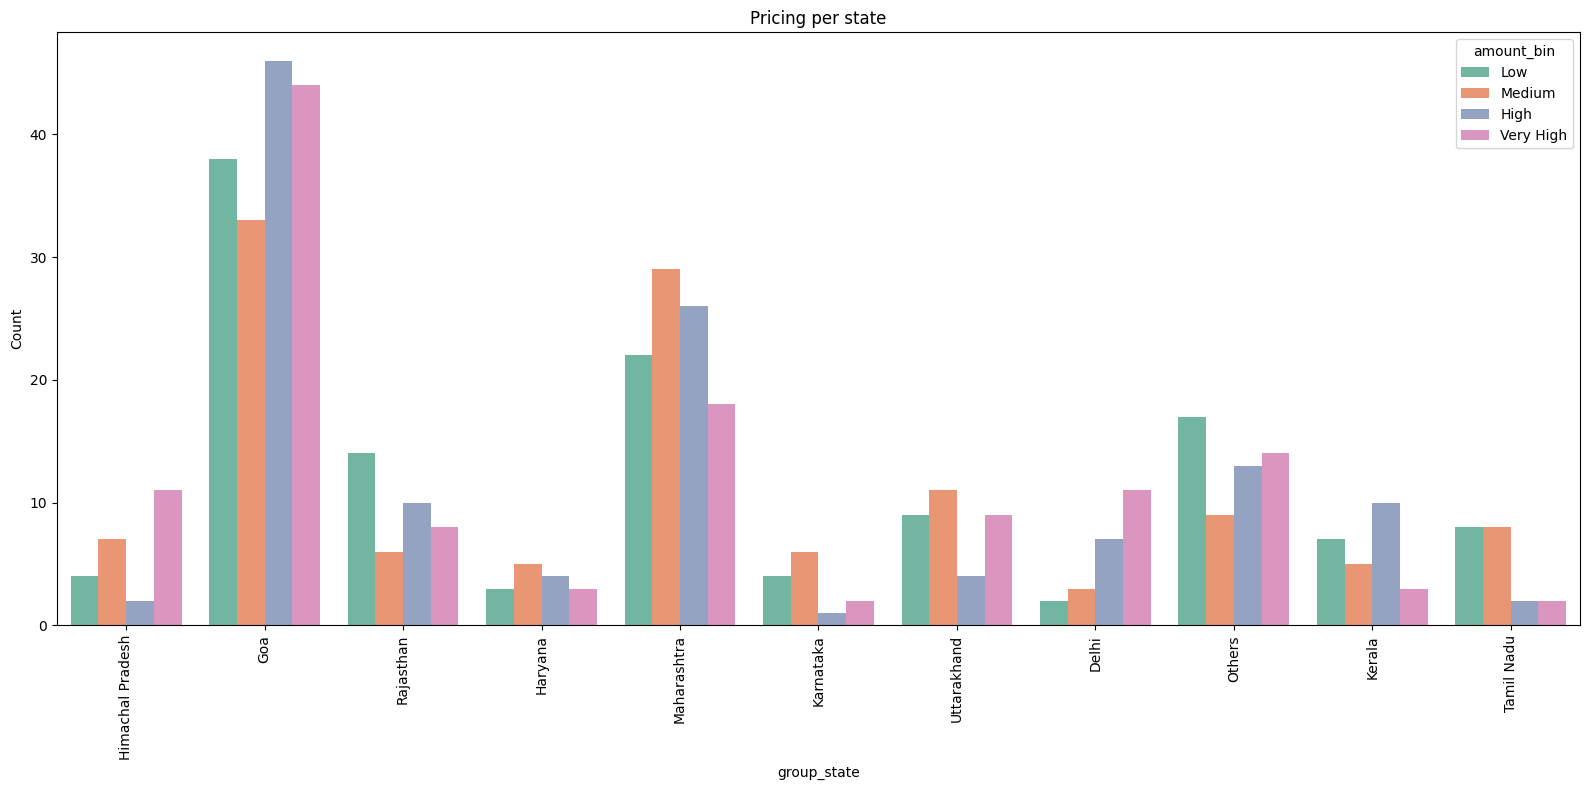

In [40]:
plt.figure(figsize=(16,8))
df['amount_bin'] = pd.qcut(df['log_amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

sns.countplot(data=df,x='group_state', hue= 'amount_bin',palette='Set2')
plt.xticks(rotation=90)
plt.title("Pricing per state")
plt.xlabel("group_state")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Understanding superhost performance

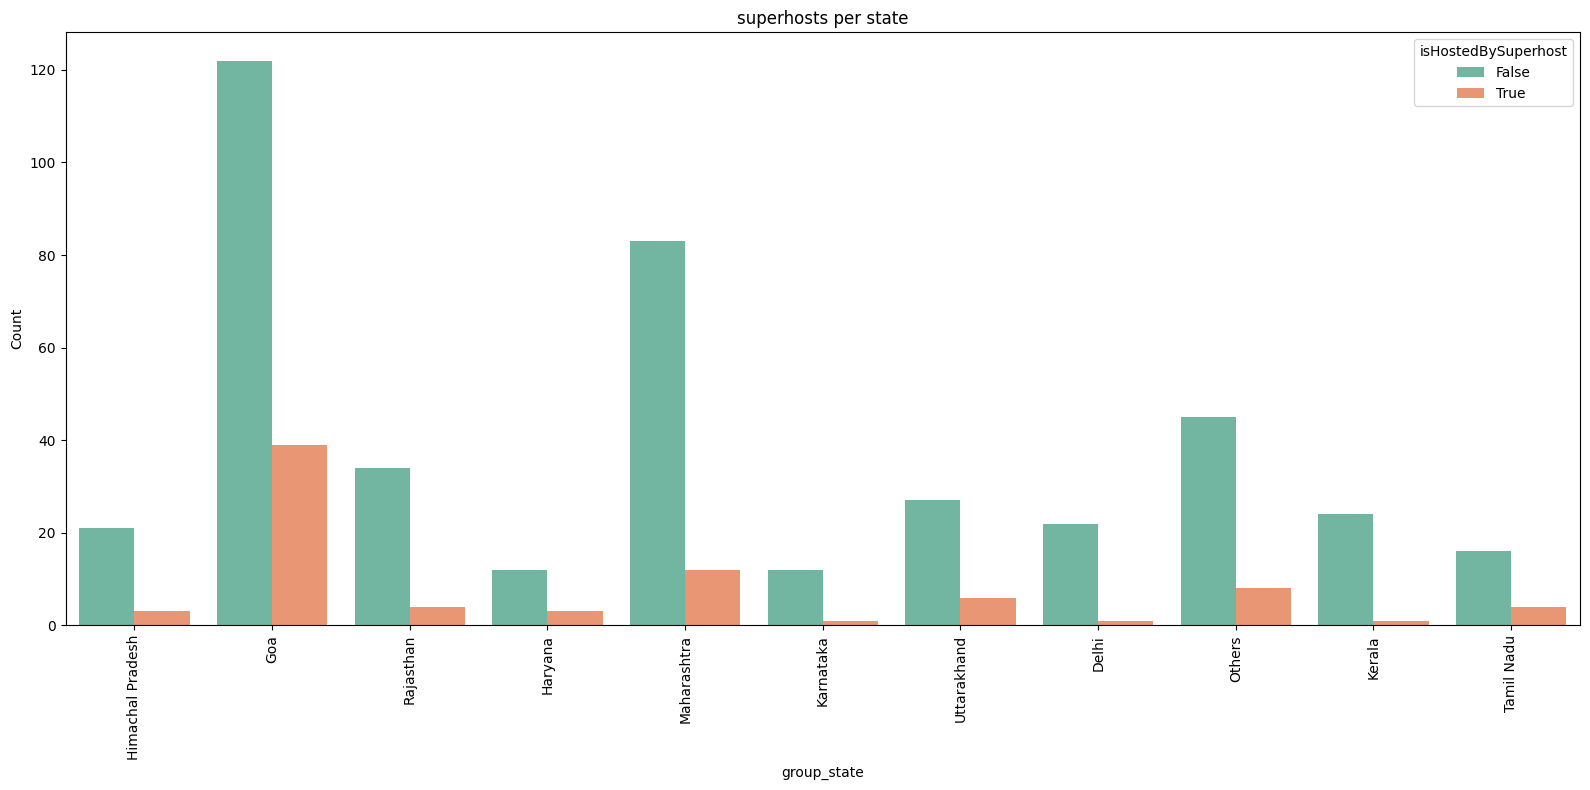

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='group_state', hue= 'isHostedBySuperhost',palette='Set2')
plt.xticks(rotation=90)
plt.title("superhosts per state")
plt.xlabel("group_state")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



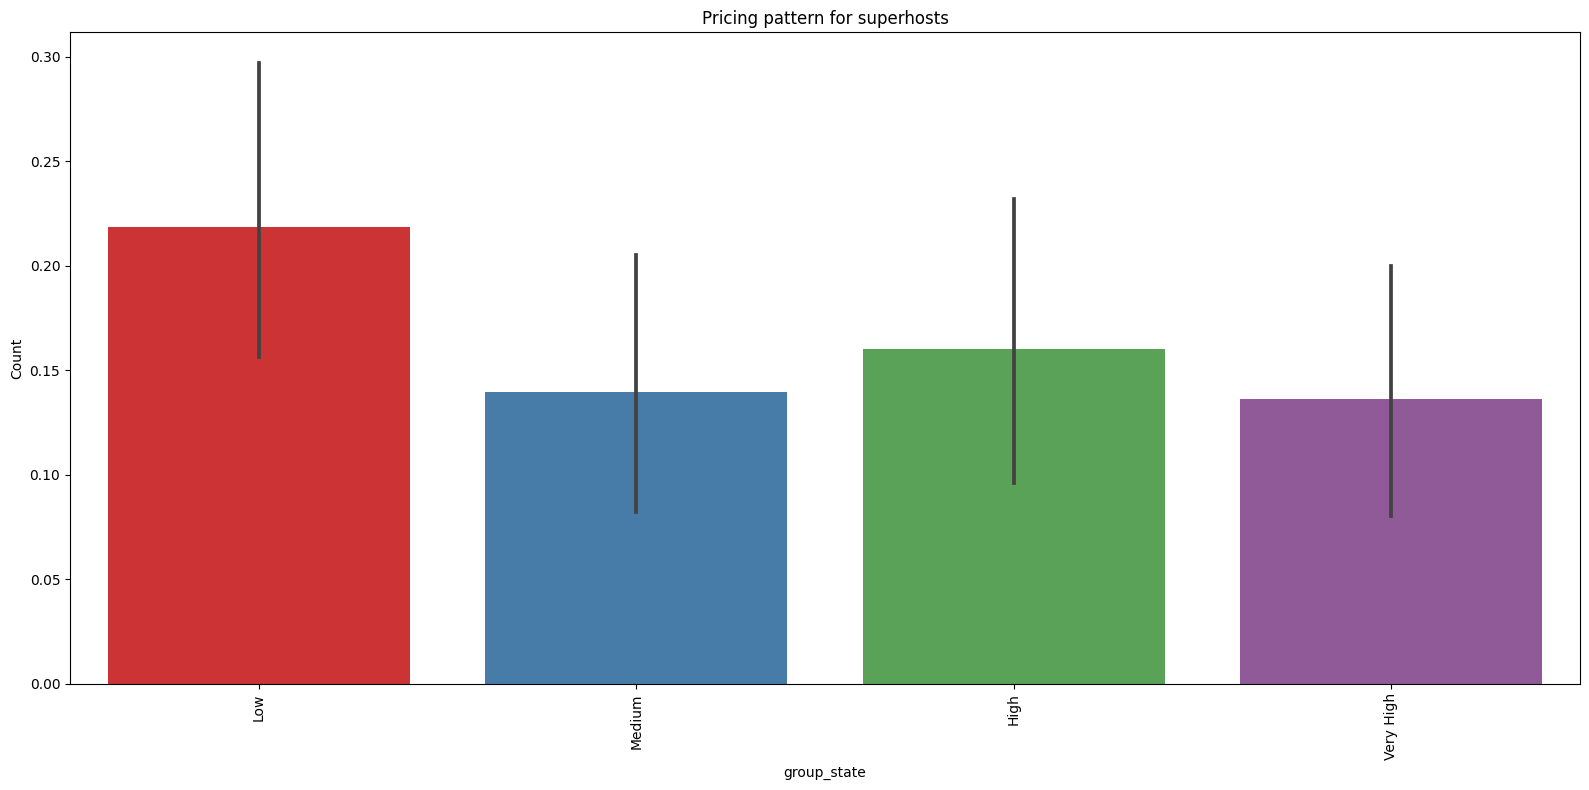

In [42]:
plt.figure(figsize=(16,8))
df['amount_bin'] = pd.qcut(df['log_amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

sns.barplot(data=df,x='amount_bin',y='isHostedBySuperhost', estimator='mean',palette='Set1')
plt.xticks(rotation=90)
plt.title("Pricing pattern for superhosts")
plt.xlabel("group_state")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [43]:
df.groupby('isHostedBySuperhost')['stars'].mean()

isHostedBySuperhost
False    4.584336
True     4.827925
Name: stars, dtype: float64

In [44]:
df.groupby(['isHostedBySuperhost','roomType'])['stars'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,isHostedBySuperhost,roomType,stars
0,False,Boat,5.000000
1,False,Camper/RV,NaN
2,False,Campsite,NaN
3,False,Castle,4.640000
4,False,Entire bungalow,4.702857
5,False,Entire chalet,4.502500
6,False,Entire condo,3.936000
7,False,Entire cottage,4.765000
8,False,Entire home,4.674444
9,False,Entire home/apt,NaN
